### For a given time window say 7 days be able to predict the ‘composite demand’ or total number of ‘piezas’

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import array as arr
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
data_dir = Path('data')
full_df = pd.concat(
    pd.read_parquet(parquet_file)
    for parquet_file in data_dir.glob('*.parquet*')
)
full_df

,BILL_DATE,MATERIAL,SALES_DIST,SOLD_TO,SHIP_TO,PIEZAS
280519,2019-03-04,10646,100074,6002572,7023126,1
326929,2019-03-04,11317,100074,6002572,7023126,1
351215,2019-03-04,1070,100074,6002572,7023126,1
365467,2019-03-04,1010,100074,6002572,7023126,1
439130,2019-03-04,2342,100074,6002572,7023126,5
...,...,...,...,...,...,...
141730332,2020-09-17,31907,100482,6001932,7003984,2
141730333,2020-09-17,36526,100482,6001932,7003984,2
141730334,2020-09-17,36879,100482,6001932,7003984,1
141730335,2020-09-17,39950,100482,6001932,7003984,5


In [2]:
bf=full_df[["BILL_DATE","PIEZAS"]]
ff=bf.groupby('BILL_DATE').PIEZAS.sum().to_frame(name = 'PIEZAS').reset_index()
ff

,BILL_DATE,PIEZAS
0,2019-03-03,50
1,2019-03-04,59
2,2019-03-05,119
3,2019-03-06,218
4,2019-03-07,67
...,...,...
589,2021-03-26,12
590,2021-03-28,10
591,2021-03-29,80
592,2021-03-30,41


In [3]:
y=ff['PIEZAS'].to_numpy()
y

array([ 50,  59, 119, 218,  67,  43, 124, 137,  60,  49,  91,  53, 219,
        46,  98,  54, 209,  70, 140, 201,  30,  48,  73,  36, 381,  60,
        17,  68,  52,  47, 205,  72,  77, 183, 181,  64, 206, 197,  69,
       465, 149,  33, 227,  81,  42, 179,  28,  78,  46, 213,  39, 174,
        51,  90, 319, 124,  54, 386, 166, 183, 180,  71,  85, 343,  43,
       133, 230,  64, 112, 198, 141,  65, 164, 101,  50,  33,  51,  38,
       246,  75,  55,  11,  45,  10, 194, 160,  36, 191,  74,  15,  26,
        93, 124, 198,  54,  40,  46,  74,  15, 205,  25,  75, 244,  70,
        42,  58,  94,  34,  46,  64,  73, 263,  40,  50, 149,  96,  64,
        20, 114,  45, 142,  69,  35, 740,  41,  29,  93, 107,  38, 647,
        56,  44,  43, 112,  56, 173,  65,  35,  43,  68,  36, 198,  52,
        42, 194,  92, 139,  64, 319,  16,  62, 212,   6, 198,  42,  16,
        87, 253,  68,  47,  27,  36,  91, 107,  85, 129,  88,  85,  38,
        42,  70,  79,  71,  55,  27, 172, 132,   6,  16, 103, 15

In [4]:
x=ff['BILL_DATE'].to_numpy()
x

array(['2019-03-03T00:00:00.000000000', '2019-03-04T00:00:00.000000000',
       '2019-03-05T00:00:00.000000000', '2019-03-06T00:00:00.000000000',
       '2019-03-07T00:00:00.000000000', '2019-03-08T00:00:00.000000000',
       '2019-03-10T00:00:00.000000000', '2019-03-11T00:00:00.000000000',
       '2019-03-12T00:00:00.000000000', '2019-03-13T00:00:00.000000000',
       '2019-03-14T00:00:00.000000000', '2019-03-15T00:00:00.000000000',
       '2019-03-17T00:00:00.000000000', '2019-03-18T00:00:00.000000000',
       '2019-03-19T00:00:00.000000000', '2019-03-20T00:00:00.000000000',
       '2019-03-21T00:00:00.000000000', '2019-03-22T00:00:00.000000000',
       '2019-03-24T00:00:00.000000000', '2019-03-25T00:00:00.000000000',
       '2019-03-26T00:00:00.000000000', '2019-03-27T00:00:00.000000000',
       '2019-03-28T00:00:00.000000000', '2019-03-29T00:00:00.000000000',
       '2019-03-31T00:00:00.000000000', '2019-04-01T00:00:00.000000000',
       '2019-04-02T00:00:00.000000000', '2019-04-03

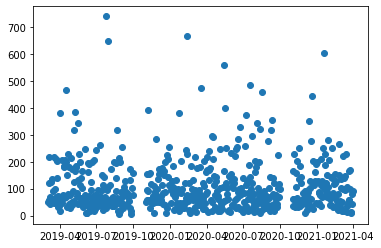

In [5]:
plt.scatter(x, y)
plt.show()